Result Analysis

In [1]:
# Importing Libraries
import pandas as pd 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
PLOT_COLORS = ["#36688D", "#F3CD05", "#F49F05", "#F18904", "#BDA589"]


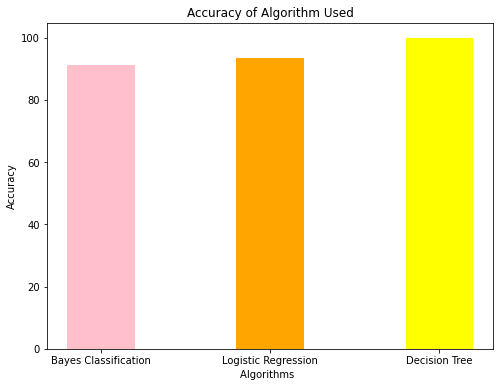

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# creating the dataset
data = {'Bayes Classification':91.06351550960117,
'Logistic Regression':93.50073855243723, 
'Decision Tree':99.81515711645102}
algos = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (8, 6))
# creating the bar plot
colors = ['pink','orange','yellow']
plt.bar(algos, values, color = colors,
        width = 0.4)
plt.xlabel("Algorithms  ")
plt.ylabel("Accuracy")
plt.title("Accuracy of Algorithm Used")
plt.show()

Respective Accuracies

Decision Tree - 99.8%

Logistic Refression - 93.5%

Bayes Classification - 91.6%

In [4]:
df = pd.read_csv("./Final-Database.csv")
df.corr()

,Title_characters,Day,time-part,Time_Category,views,Tag_words,No. Of Charcters (Tags),T/NT,likes,dislikes,comment_count,Comment Disabled
Title_characters,1.000000,-0.004891,-0.090722,0.026638,-0.039916,0.355402,0.339992,-0.142971,-0.118296,-0.017467,-0.073091,0.045747
Day,-0.004891,1.000000,0.033152,-0.014322,-0.000197,0.021442,0.021289,-0.000749,-0.006423,-0.002759,-0.004428,-0.002717
time-part,-0.090722,0.033152,1.000000,-0.249546,0.015467,0.004720,0.016136,-0.008193,0.034102,0.016982,0.024946,0.015489
Time_Category,0.026638,-0.014322,-0.249546,1.000000,0.014437,-0.078439,-0.076622,0.027699,-0.009164,-0.003294,-0.018153,0.010901
views,-0.039916,-0.000197,0.015467,0.014437,1.000000,0.045788,0.032908,0.340320,0.853458,0.724484,0.775190,-0.019533
Tag_words,0.355402,0.021442,0.004720,-0.078439,0.045788,1.000000,0.956174,0.048139,-0.016820,0.020932,-0.006515,0.006310
No. Of Charcters (Tags),0.339992,0.021289,0.016136,-0.076622,0.032908,0.956174,1.000000,0.034235,-0.024186,0.016244,-0.011698,0.005197
T/NT,-0.142971,-0.000749,-0.008193,0.027699,0.340320,0.048139,0.034235,1.000000,0.357841,0.077508,0.214539,-0.068707
likes,-0.118296,-0.006423,0.034102,-0.009164,0.853458,-0.016820,-0.024186,0.357841,1.000000,0.595594,0.818951,-0.028442
dislikes,-0.017467,-0.002759,0.016982,-0.003294,0.724484,0.020932,0.016244,0.077508,0.595594,1.000000,0.802992,-0.005183


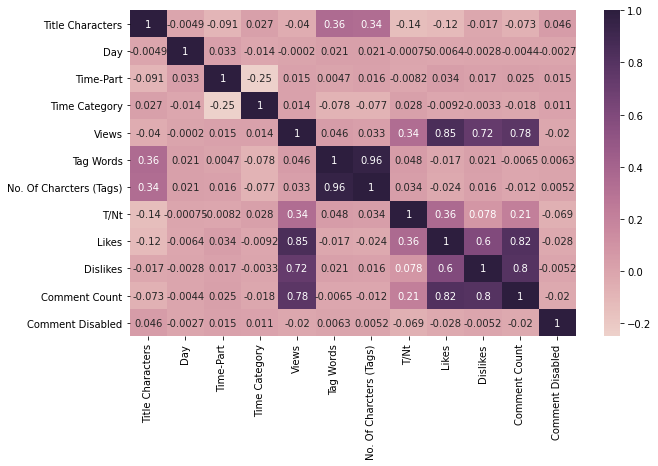

In [5]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

<p>The correlation map and correlation table above say that views and likes are highly positively correlated which is 0.85. Let's verify that by plotting a scatter plot between views and likes to visualize the relationship between these variables.</p>

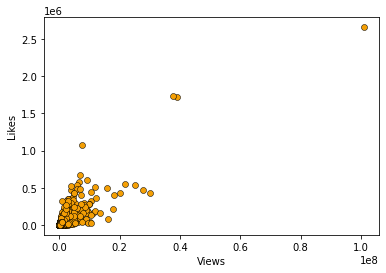

In [6]:
# Scatter Plot
fig, ax = plt.subplots()
_ = plt.scatter(x=df['views'], y=df['likes'], color=PLOT_COLORS[2], 
edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Likes")

We see that views and likes are truly positively correlated: as one increases, the other increases too—mostly.

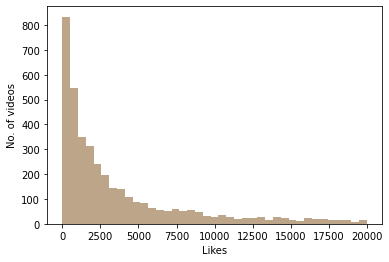

In [10]:
# Likes Analysis
fig, ax = plt.subplots()
_ = sns.distplot(df[df["likes"] <= 2e4]["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

We can see that the majority of trending videos have 20000 likes or less.

In [11]:
df[df['likes'] < 2e4]['likes'].count() / df['likes'].count() * 100

83.69565217391305

So, it is around 84%, which means that the percentage of videos with less than 2 lakh likes are more trending.

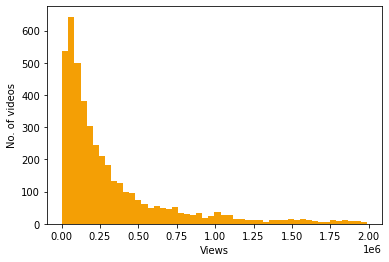

In [12]:
# Views Analysis
fig, ax = plt.subplots()
_ = sns.distplot(df[df["views"] < 2e6]["views"], kde=False, 
                 color=PLOT_COLORS[2], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos")

We can see that the majority of trending videos have 2000000 views or less.

In [13]:
df[df['views'] < 2e6]['views'].count() / df['views'].count() * 100


94.41304347826087

So, it is around 94%, which means that the percentage of videos with less than 2 million views are more trending.

In [14]:
df.columns

Index(['Video_Title', 'Title_characters', 'Channel_title', 'Publish_date',
       'day of the week', 'Day', 'Time', 'time-part', 'Time_Category',
       'publish_time', 'views', 'tags', 'Tag_words', 'No. Of Charcters (Tags)',
       'T/NT', 'likes', 'dislikes', 'comment_count', 'Comment Disabled',
       'Description'],
      dtype='object')

In [15]:
dataframe = df[df["T/NT"] > 0]
print(dataframe.shape)

(872, 20)


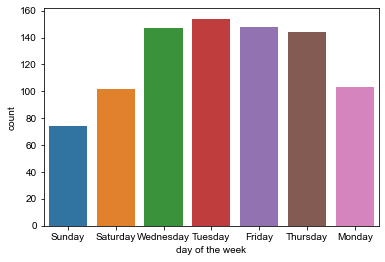

In [16]:
sns.countplot(x = 'day of the week', data = dataframe)
sns.set(rc={'figure.figsize':(5,5)})

The countplot clearly shows that the best day to upload your video is Tuesday.

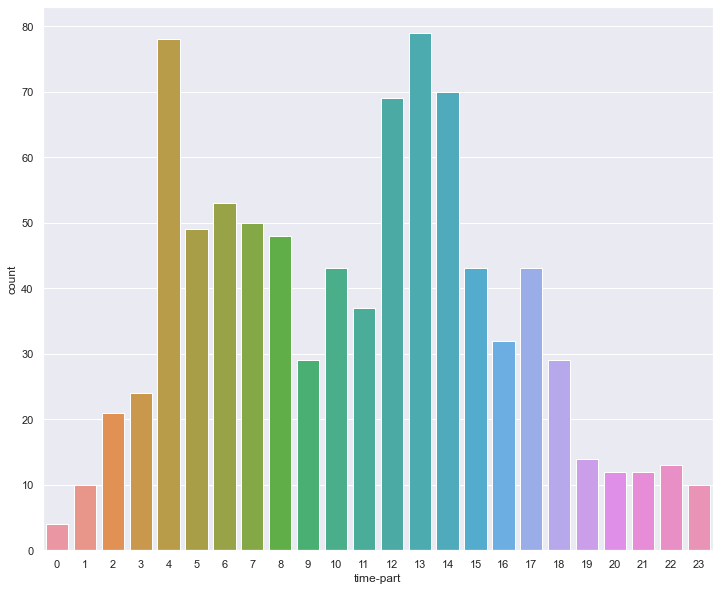

In [18]:
sns.countplot(x='time-part',data = dataframe)
sns.set(rc={'figure.figsize':(14,10)})

The countplot clearly shows that the best time to upload your video is 1PM.